#  Binomial Logistic in R

## Load Dataset

In [1]:
hd<-read.csv(file.choose())

In [2]:
head(hd)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


## Checking Null Values 

In [3]:
sum(is.na(hd))

[1] 0

## Split Dataset into test and train

In [4]:
library(caTools)
set.seed(90)
sample <- sample.split(hd$target,SplitRatio = 0.75)
set.seed(90)
train1 <- subset(hd,sample == TRUE)
set.seed(90)
test1 <- subset(hd,sample ==FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

In [5]:
dim(train1) ; dim(test1)

[1] 768  14

[1] 257  14

## Model Creation  

In [6]:
Gmodel = glm(target~., data = train1, family = binomial(link ="logit"))
Gmodel


Call:  glm(formula = target ~ ., family = binomial(link = "logit"), 
    data = train1)

Coefficients:
(Intercept)          age          sex           cp     trestbps         chol  
   4.216771    -0.015622    -1.943291     0.761320    -0.016835    -0.006213  
        fbs      restecg      thalach        exang      oldpeak        slope  
  -0.375482     0.178442     0.022398    -0.968104    -0.577530     0.591053  
         ca         thal  
  -0.629492    -0.820686  

Degrees of Freedom: 767 Total (i.e. Null);  754 Residual
Null Deviance:	    1064 
Residual Deviance: 557.6 	AIC: 585.6

In [7]:
coef(Gmodel)

(Intercept)          age          sex           cp     trestbps         chol 
 4.216770509 -0.015621941 -1.943290519  0.761320314 -0.016835332 -0.006213346 
         fbs      restecg      thalach        exang      oldpeak        slope 
-0.375481916  0.178442028  0.022397568 -0.968103864 -0.577529934  0.591053050 
          ca         thal 
-0.629492335 -0.820685891

In [8]:
summary(Gmodel)


Call:
glm(formula = target ~ ., family = binomial(link = "logit"), 
    data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4138  -0.4010   0.1204   0.6027   2.6822  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.216771   1.606118   2.625 0.008654 ** 
age         -0.015622   0.014268  -1.095 0.273570    
sex         -1.943291   0.292130  -6.652 2.89e-11 ***
cp           0.761320   0.111932   6.802 1.03e-11 ***
trestbps    -0.016835   0.006335  -2.658 0.007867 ** 
chol        -0.006213   0.002252  -2.759 0.005793 ** 
fbs         -0.375482   0.312225  -1.203 0.229132    
restecg      0.178442   0.214750   0.831 0.406013    
thalach      0.022398   0.006392   3.504 0.000458 ***
exang       -0.968104   0.265248  -3.650 0.000262 ***
oldpeak     -0.577530   0.131041  -4.407 1.05e-05 ***
slope        0.591053   0.207790   2.844 0.004448 ** 
ca          -0.629492   0.115271  -5.461 4.74e-08 ***
thal        -0.820686   0.1

## Check Over Dispersion 

In [9]:
Gmodel$deviance/Gmodel$df.residual

[1] 0.7394767

##  Predict the model for Train data

In [10]:
predtrain <- predict(Gmodel, newdata = train1, type = "response")
predtrain

1            3            5            7            8            9 
0.2431034678 0.0134411451 0.0594801843 0.0135809213 0.0227981436 0.3706993204 
          12           14           15           16           17           19 
0.0631447815 0.0009350003 0.5941369484 0.9915976961 0.8696011693 0.9668498851 
          20           21           22           23           24           25 
0.8892336292 0.5102743724 0.8126567883 0.1291010991 0.9867420591 0.9915689161 
          28           29           30           32           33           34 
0.7523255481 0.4435684727 0.0624335518 0.9668498851 0.0462214983 0.0160017462 
          35           37           38           39           40           41 
0.9523672398 0.5663943462 0.7234789925 0.0274040820 0.4890061815 0.9050182743 
          42           43           45           46           48           49 
0.6270726384 0.9129944776 0.9252415641 0.8266601218 0.0828169965 0.9044531487 
          53           54           56           57           59           60 
0.7043005989 0.1442363695 0.0018499846 0.7545986956 0.4749852778 0.6670017704 
          61           63           64           68           69           71 
0.9604824720 0.0351617452 0.7247130500 0.1314038292 0.9951891216 0.0030369034 
          72           73           74           76           77           78 
0.0389196909 0.0604223607 0.2358401256 0.8981228064 0.7987608090 0.0079906976 
          79           80           81           83           84           85 
0.7076748962 0.7076748962 0.5480012821 0.3678123821 0.7043005989 0.9951891216 
          87           88           89           90           91           92 
0.8892336292 0.5452451110 0.1024985360 0.0105101366 0.9909846948 0.9620216143 
          94           96           97           98           99          101 
0.1844683405 0.7300072912 0.8533610121 0.0048479762 0.5399126337 0.9878539471 
         102          103          105          108          109          112 
0.7773480042 0.6996405816 0.9903275454 0.0628531282 0.6584750968 0.1080090006 
         113          114          115          117          118          119 
0.0584987876 0.0124904195 0.5182938679 0.0762741266 0.0425541974 0.9604824720 
         120          122          124          125          126          127 
0.8668147621 0.1844683405 0.7967700007 0.0104693882 0.9898119127 0.3650443653 
         128          129          131          133          134          136 
0.5621952668 0.5649616888 0.9898119127 0.8538983991 0.9523672398 0.1063524002 
         138          139          140          141          142          143 
0.5908710003 0.8981228064 0.9027606730 0.0074607806 0.7552971595 0.3798590241 
         144          145          146          147          149          150 
0.9872174330 0.7773768266 0.0640583670 0.9781219374 0.6365078966 0.9207459923 
         151          152          153          154          155          159 
0.0135809213 0.4154541001 0.2124927245 0.6270726384 0.0038925575 0.5102259238 
         160          165          166          167          168          171 
0.9606116206 0.0604223607 0.0030369034 0.0656713592 0.7616802927 0.5559166159 
         172          174          175          177          178          180 
0.0068880151 0.9976229602 0.0181257448 0.0068880151 0.0096183813 0.0358806889 
         182          183          184          185          186          187 
0.6369169336 0.0543343815 0.9484274281 0.8336196653 0.0059072371 0.0640583670 
         188          189          191          192          193          195 
0.0604223607 0.0762741266 0.9690837314 0.7249363044 0.5102259238 0.0036911578 
         196          197          198          199          201          203 
0.7247130500 0.4838099345 0.8459579477 0.9777375924 0.9620216143 0.6365078966 
         204          205          206          207          208          209 
0.6316498707 0.9044531487 0.8455512920 0.5182938679 0.9690837314 0.7043005989 
         210          211          212          213          

In [11]:
predtrain<- ifelse(predtrain >0.6,1,0)
predtrain

1    3    5    7    8    9   12   14   15   16   17   19   20   21   22   23 
   0    0    0    0    0    0    0    0    0    1    1    1    1    0    1    0 
  24   25   28   29   30   32   33   34   35   37   38   39   40   41   42   43 
   1    1    1    0    0    1    0    0    1    0    1    0    0    1    1    1 
  45   46   48   49   53   54   56   57   59   60   61   63   64   68   69   71 
   1    1    0    1    1    0    0    1    0    1    1    0    1    0    1    0 
  72   73   74   76   77   78   79   80   81   83   84   85   87   88   89   90 
   0    0    0    1    1    0    1    1    0    0    1    1    1    0    0    0 
  91   92   94   96   97   98   99  101  102  103  105  108  109  112  113  114 
   1    1    0    1    1    0    0    1    1    1    1    0    1    0    0    0 
 115  117  118  119  120  122  124  125  126  127  128  129  131  133  134  136 
   0    0    0    1    1    0    1    0    1    0    0    0    1    1    1    0 
 138  139  140  141  142  143  144  145  146  147  149  150  151  152  153  154 
   0    1    1    0    1    0    1    1    0    1    1    1    0    0    0    1 
 155  159  160  165  166  167  168  171  172  174  175  177  178  180  182  183 
   0    0    1    0    0    0    1    0    0    1    0    0    0    0    1    0 
 184  185  186  187  188  189  191  192  193  195  196  197  198  199  201  203 
   1    1    0    0    0    0    1    1    0    0    1    0    1    1    1    1 
 204  205  206  207  208  209  210  211  212  213  214  215  217  218  219  220 
   1    1    1    0    1    1    0    1    0    0    1    1    0    1    0    0 
 221  222  225  229  231  232  233  235  238  239  241  243  244  245  246  247 
   1    0    0    1    0    1    0    1    0    0    1    1    0    0    1    0 
 248  249  250  251  252  253  255  256  257  258  260  261  265  266  267  269 
   0    1    1    0    1    0    0    0    1    0    0    1    0    0    0    0 
 270  271  272  273  274  275  276  277  278  280  281  283  284  285  286  287 
   1    1    1    1    0    0    0    0    1    1    1    1    1    0    1    1 
 288  289  290  291  292  294  295  296  298  299  301  302  303  304  305  308 
   1    1    1    0    0    1    0    0    0    1    1    1    1    0    1    1 
 309  311  313  314  315  317  318  320  321  322  324  326  327  329  330  331 
   0    0    0    1    1    1    1    1    1    1    0    1    0    0    1    1 
 332  333  334  336  338  339  340  341  342  344  345  349  350  352  353  354 
   0    0    1    0    0    0    0    1    1    1    1    0    0    0    0    0 
 355  357  358  360  361  362  363  364  368  369  370  371  372  373  375  377 
   0    0    0    1    1    0    1    0    0    0    1    0    0    1    1    1 
 379  380  381  384  386  387  389  391  392  393  394  395  396  397  398  399 
   0    1    0    0    1    1    0    1    1    1    0    0    1    0    0    0 
 400  401  402  403  404  405  406  407  408  409  410  411  412  413  414  415 
   1    0    1    1    1    0    0    1    0    1    0    1    0    0    0    1 
 416  417  418  419  420  421  424  425  426  427  428  429  430  431  433  434 
   1    0    0    1    1    1    1    0    0    1    1    0    1    0    1    0 
 435  436  437  440  441  442  443  445  446  448  449  450  453  454  455  456 
   1    1    0    0    0    0    0    1    1    0    1    1    0    1    0    0 
 457  458  459  461  462  463  464  465  466  467  468  470  471  473  474  475 
   1    1    0    0    1    1    1    0    1    1    0    0    1    1    1    0 
 476  478  479  480  482  483  487  488  489  490  492  493  495  496  497  499 
   1    0    1    0    0    0    1    0    1    0    1    0    0    0    0    0 
 500  502  503  504  505  506  507  508  511  512  513  514  516  518  520  522 
   1    1    1    1    1    1    0    1    1    0    0    0    0    1    0    0 
 523  525  526  527  528  529  530  533  534  535  536  537  538  539  540  542 
   1    0    1    0    1    0    0

In [12]:
class(predtrain)

[1] "numeric"

In [13]:
ct1 <- table(predicted = predtrain,observed =train1$target)
ct1

         observed
predicted   0   1
        0 327  77
        1  47 317

In [14]:
accuracy <- sum(ct1[1,1],ct1[2,2])/sum(ct1)
accuracy

[1] 0.8385417

In [15]:
library(caret)
confusionMatrix(ct1)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2


Confusion Matrix and Statistics

         observed
predicted   0   1
        0 327  77
        1  47 317
                                          
               Accuracy : 0.8385          
                 95% CI : (0.8106, 0.8639)
    No Information Rate : 0.513           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6775          
                                          
 Mcnemar's Test P-Value : 0.009207        
                                          
            Sensitivity : 0.8743          
            Specificity : 0.8046          
         Pos Pred Value : 0.8094          
         Neg Pred Value : 0.8709          
             Prevalence : 0.4870          
         Detection Rate : 0.4258          
   Detection Prevalence : 0.5260          
      Balanced Accuracy : 0.8395          
                                          
       'Positive' Class : 0               
                                   

## Predict the model for Test data 

In [16]:
predtest <- predict(Gmodel, newdata = test1, type = "response")
predtest

2           4           6          10          11          13 
0.013425252 0.364151553 0.766903720 0.007185938 0.785841453 0.991597696 
         18          26          27          31          36          44 
0.009870672 0.225939708 0.880973116 0.184468341 0.367812382 0.370699320 
         47          50          51          52          55          58 
0.853898399 0.047804490 0.971449388 0.366023479 0.001849985 0.808427061 
         62          65          66          67          70          75 
0.904453149 0.960482472 0.636220940 0.562195267 0.005777416 0.058498788 
         82          86          93          95         100         104 
0.532607355 0.923226987 0.007990698 0.715012261 0.903833873 0.898122806 
        106         107         110         111         116         121 
0.068891718 0.135069718 0.126648996 0.799922572 0.225939708 0.699640582 
        123         130         132         135         137         148 
0.004532922 0.703862223 0.977082931 0.699640582 0.925241564 0.725371095 
        156         157         158         161         162         163 
0.699640582 0.809655436 0.627072638 0.068489722 0.647105788 0.068489722 
        164         169         170         173         176         179 
0.330000163 0.645510629 0.973773253 0.725276551 0.002004329 0.799922572 
        181         190         194         200         202         216 
0.007990698 0.119817155 0.538172200 0.062306008 0.987217433 0.836255190 
        223         224         226         227         228         230 
0.636916934 0.997622960 0.617119347 0.532607355 0.961744319 0.082816996 
        234         236         237         240         242         254 
0.975518123 0.631649871 0.532607355 0.501889259 0.474985278 0.005907237 
        259         262         263         264         268         279 
0.432750395 0.617119347 0.857787694 0.925241564 0.106674196 0.022798144 
        282         293         297         300         306         307 
0.945705727 0.285674411 0.106674196 0.837389874 0.005963424 0.961744319 
        310         312         316         319         323         325 
0.824235656 0.058498788 0.845551292 0.235840126 0.015139523 0.808427061 
        328         335         337         343         346         347 
0.074304546 0.009377087 0.777348004 0.953252144 0.080287483 0.045284285 
        348         351         356         359         365         366 
0.990984695 0.365044365 0.740976514 0.850542612 0.934014889 0.599320882 
        367         374         376         378         382         383 
0.337757932 0.459497944 0.322152294 0.196598897 0.225088016 0.048973029 
        385         388         390         422         423         432 
0.288898853 0.068489722 0.627048280 0.822382780 0.761680293 0.075463253 
        438         439         444         447         451         452 
0.007198410 0.953896259 0.883791320 0.599320882 0.011636325 0.953884519 
        460         469         472         477         481         484 
0.558902584 0.285674411 0.900226548 0.005907237 0.302196571 0.945705727 
        485         486         491         494         498         501 
0.539912634 0.062853128 0.853361012 0.017497974 0.667001770 0.785841453 
        509         510         515         517         519         521 
0.002004329 0.062433552 0.923226987 0.009377087 0.144236369 0.235840126 
        524         531         532         541         547         557 
0.364151553 0.123030726 0.953252144 0.004889466 0.007443972 0.235840126 
        561         563         567         569         574         577 
0.833933100 0.991568916 0.957202890 0.975726056 0.558914330 0.636507897 
        578         580         581         582         587         588 
0.007443972 0.027373347 0.803580164 0.946036287 0.119817155 0.050757448 
        589         590         597         598         609         616 
0.225939708 0.007185938 0.691530351 0.704300599 0.102304707 0.965116764 
        622         625         627         632         636         

In [17]:
predtest<- ifelse(predtest >0.6,1,0)
predtest

2    4    6   10   11   13   18   26   27   31   36   44   47   50   51   52 
   0    0    1    0    1    1    0    0    1    0    0    0    1    0    1    0 
  55   58   62   65   66   67   70   75   82   86   93   95  100  104  106  107 
   0    1    1    1    1    0    0    0    0    1    0    1    1    1    0    0 
 110  111  116  121  123  130  132  135  137  148  156  157  158  161  162  163 
   0    1    0    1    0    1    1    1    1    1    1    1    1    0    1    0 
 164  169  170  173  176  179  181  190  194  200  202  216  223  224  226  227 
   0    1    1    1    0    1    0    0    0    0    1    1    1    1    1    0 
 228  230  234  236  237  240  242  254  259  262  263  264  268  279  282  293 
   1    0    1    1    0    0    0    0    0    1    1    1    0    0    1    0 
 297  300  306  307  310  312  316  319  323  325  328  335  337  343  346  347 
   0    1    0    1    1    0    1    0    0    1    0    0    1    1    0    0 
 348  351  356  359  365  366  367  374  376  378  382  383  385  388  390  422 
   1    0    1    1    1    0    0    0    0    0    0    0    0    0    1    1 
 423  432  438  439  444  447  451  452  460  469  472  477  481  484  485  486 
   1    0    0    1    1    0    0    1    0    0    1    0    0    1    0    0 
 491  494  498  501  509  510  515  517  519  521  524  531  532  541  547  557 
   1    0    1    1    0    0    1    0    0    0    0    0    1    0    0    0 
 561  563  567  569  574  577  578  580  581  582  587  588  589  590  597  598 
   1    1    1    1    0    1    0    0    1    1    0    0    0    0    1    1 
 609  616  622  625  627  632  636  637  638  658  660  672  675  676  678  682 
   0    1    0    0    0    1    1    0    1    1    1    0    0    0    0    0 
 683  686  692  702  704  714  718  719  720  722  725  728  729  731  732  738 
   0    0    1    0    0    1    0    1    0    1    1    1    0    1    1    0 
 740  742  745  746  755  756  760  768  775  776  782  794  796  801  803  807 
   0    1    1    1    1    1    1    0    1    1    0    1    1    0    1    0 
 808  809  812  813  814  816  825  827  835  837  845  848  851  853  856  867 
   1    1    0    0    0    0    0    1    0    1    0    0    0    0    1    1 
 869  870  874  875  877  878  879  881  885  888  897  898  905  917  923  945 
   1    1    1    1    0    1    0    0    0    0    0    1    1    0    1    0 
 950  953  956  957  960  965  967  973  974  980  985  991 1001 1005 1007 1021 
   0    1    0    1    1    1    0    1    0    0    0    1    0    1    1    1 
1023 
   0

In [18]:
class(predtest)

[1] "numeric"

In [19]:
ct2 <- table(predicted = predtest,observed =test1$target)
ct2

         observed
predicted   0   1
        0 114  21
        1  11 111

In [20]:
accuracy <- sum(ct2[1,1],ct2[2,2])/sum(ct2)
accuracy

[1] 0.8754864

In [21]:
confusionMatrix(ct2)

Confusion Matrix and Statistics

         observed
predicted   0   1
        0 114  21
        1  11 111
                                          
               Accuracy : 0.8755          
                 95% CI : (0.8288, 0.9133)
    No Information Rate : 0.5136          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7513          
                                          
 Mcnemar's Test P-Value : 0.1116          
                                          
            Sensitivity : 0.9120          
            Specificity : 0.8409          
         Pos Pred Value : 0.8444          
         Neg Pred Value : 0.9098          
             Prevalence : 0.4864          
         Detection Rate : 0.4436          
   Detection Prevalence : 0.5253          
      Balanced Accuracy : 0.8765          
                                          
       'Positive' Class : 0               
                                   

### Another model to check overall fitness [chi Square Test]

In [22]:
Gmodelnull <- glm(target~1,data = train1, family = binomial(link = "logit"))

In [23]:
Gmodelnull


Call:  glm(formula = target ~ 1, family = binomial(link = "logit"), 
    data = train1)

Coefficients:
(Intercept)  
     0.0521  

Degrees of Freedom: 767 Total (i.e. Null);  767 Residual
Null Deviance:	    1064 
Residual Deviance: 1064 	AIC: 1066

In [24]:
logfull <- logLik(Gmodel)
lognull <- logLik(Gmodelnull)

In [25]:
logfull ; lognull

'log Lik.' -278.7827 (df=14)

'log Lik.' -532.0766 (df=1)

In [26]:
library(caret)

In [27]:
2*(logfull-lognull)

'log Lik.' 506.5877 (df=14)

In [28]:
qchisq(0.05,14)

[1] 6.570631

In [29]:
1-(logfull/lognull)

'log Lik.' 0.4760478 (df=14)

In [30]:
library(rcompanion)
nagelkerke(Gmodel)

Warning message:
"package 'rcompanion' was built under R version 3.6.2"

$Models
                                                            
Model: "glm, target ~ ., binomial(link = \"logit\"), train1"
Null:  "glm, target ~ 1, binomial(link = \"logit\"), train1"

$Pseudo.R.squared.for.model.vs.null
                             Pseudo.R.squared
McFadden                             0.476048
Cox and Snell (ML)                   0.482952
Nagelkerke (Cragg and Uhler)         0.644082

$Likelihood.ratio.test
 Df.diff LogLik.diff  Chisq     p.value
     -13     -253.29 506.59 5.8355e-100

$Number.of.observations
          
Model: 768
Null:  768

$Messages
[1] "Note: For models fit with REML, these statistics are based on refitting with ML"

$Warnings
[1] "None"

## ROC Curve

Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"Registered S3 method overwritten by 'gdata':
  method         from     
  reorder.factor DescTools

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



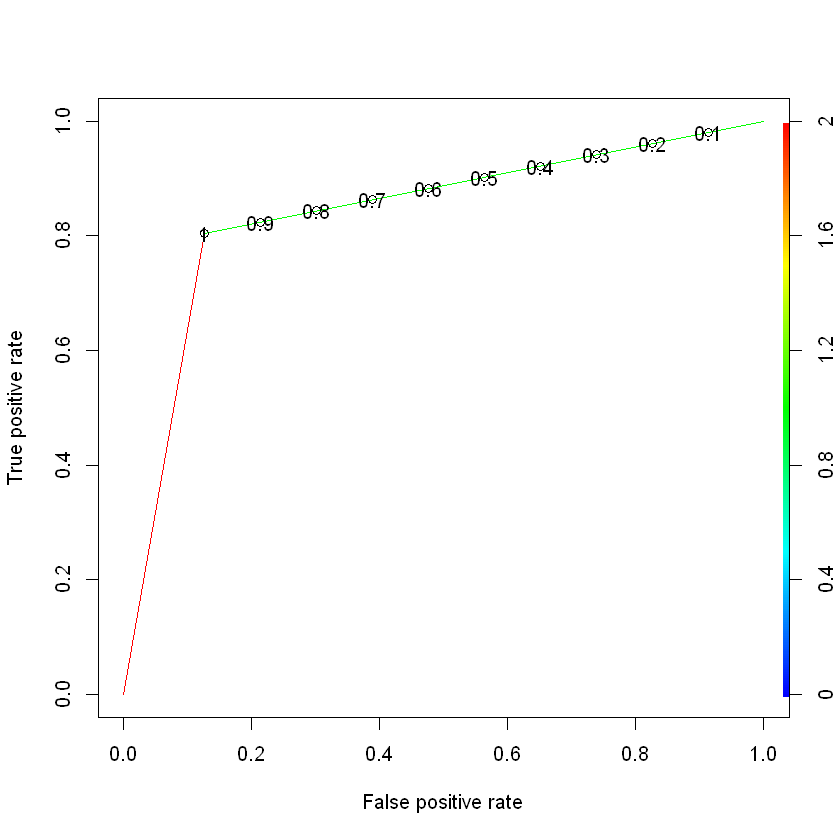

In [31]:
library(ROCR)
ROCRpred <- prediction(predtrain,train1$target)
ROCRpref <- performance(ROCRpred,"tpr","fpr")
plot(ROCRpref, colorize=TRUE,print.cutoffs.at=seq(0.1,by=0.1))